# Домашнее задание №2

Задание выполнил(а): ```Соломенцев Александр```

### Общая информация

__Дата выдачи:__ 17.12.2021

__Дедлайн:__ 13.01.2022 23:30

# О задании

В этом домашнем задании вы реализуете градиентный спуск и стохастический градиентный спуск для обучения линейной регрессии, попрактикуетесь в анализе данных и их обработке, а также примените модели линейной регрессии на практике и проанализируете результаты.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.


### Оценивание и штрафы


#### Gradient Descent [8 баллов]
* [Задание 1](#task1) [1 балл]
* [Задание 2](#task2) [2 балла]
* [Задание 3](#task3) [3 балла]
* [Задание 4](#task4) [2 балла]

#### Linear Regression [8 баллов] + 2 бонусных
* [Задание 1](#task21) [1 балл]
* [Задание 2](#task22) [1 балл]
* [Задание 3](#task23) [1 балл]
* [Задание 4](#task24) [1 балл]
* [Задание 5](#task25) [1 балл]
* [Задание 6](#task26) [1 балл]
* [Задание 7](#task27) [1 балл]
* [Задание 8](#task28) [1 балл]
* [Задание 9](#task29) [2 баллa]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{16},$$ где $s$ - сумма набранных балов. С учетом бонусов, за домашнее задание можно получить > 10 балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/890). 

## Часть 1. Gradient Descent

Среднеквадратичная ошибка на всем датасете $(X, y) = \{(x_1, y_1), \ldots, (x_\ell, y_\ell)\}$ для линейной регрессии с вектором весов $w$ (в предположении, что в данных есть единичный признак) представляется следующим образом:

$$
Q(w) = \frac{1}{\ell}\|Xw - y\|_2^2
$$

Градиент данного функционала потерь по $w$:

$$
\nabla_w Q(w) = \frac{2}{\ell}X^T(Xw - y)
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Для тестирования реализованных вами методов будет использоваться датасет о ценах домов из `sklearn`.

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# загружаем данные
data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# делим данные на обучающую и тестовую часть
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.3, random_state=10)

/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

### Задание 1 <a id="task1"></a>

С линейной регрессией удобно работать в матрично-векторном виде, если предположить, что в данных есть единичный признак. Реализуйте функцию, которая принимает на вход матрицу объекты-признаки, и добавляет в нее столбец (первый), заполненный единицами. Примените написанную функцию к обучающей и тестовой части имеющихся данных.

Например, если на вход подается матрица 
$$
\begin{pmatrix}
2 & 4 & 4200\\
0 & 10 & 5000\\
2 & 2 & 1000\\
\end{pmatrix},
$$
то на выходе будет матрица
$$
\begin{pmatrix}
1 & 2 & 4 & 4200\\
1 & 0 & 10 & 5000\\
1 & 2 & 2 & 1000\\
\end{pmatrix}$$

**Hint** 
- Вам могут пригодиться функции `np.concatenate`, `np.ones`

In [3]:
# create function
def add_identity_feature(X):
    '''
    INPUT:
    X - np.array shape=(ℓ, d-1)
    
    OUTPUT:
    X - np.array shape=(ℓ, d)
    '''
    # your code here
    X = np.concatenate( (np.ones( (len(X), 1), dtype=int), X), axis=1)
    return X

# apply to train and test
# your code here
X_train = add_identity_feature(X_train)
X_test = add_identity_feature(X_test)

In [4]:
# test yourself
assert X_train.shape == (354, 14)
assert len(X_train) == X_train.sum(axis=0)[0]

assert X_test.shape == (152, 14)
assert len(X_test) == X_test.sum(axis=0)[0]

### Задание 2 <a id="task2"></a>

Реализуйте подсчет среднеквадратичной функции потерь и ее градиента по весам. Формулы должны быть реализованы в явном виде с помощью `numpy`, без использования циклов `for`.

**Hint** 
- Для умножения матрицы на вектор (или матрицы на матрицу) можно использовать функцию `np.dot`. 
- Не забывайте, что оператор `*` используется только для поэлементного умножения.
- Также может пригодиться функция `np.linalg.norm`

In [5]:
def mse_loss(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    loss - scalar
    """
    
    # your code here
    loss = np.mean((X @ w - y) ** 2)
    return loss


def mse_grad(X, y, w):
    """
    INPUT:
    X - np.array shape=(ℓ, d)
    y - np.array shape=(ℓ,)
    w - np.array shape=(d,)
    
    OUTPUT:
    grad - np.array shape=(d,)
    """

    # your code here
    grad = 2 / len(X) * (X.T @ X @ w - X.T @ y)
    return grad

Посчитайте `result_mse_sklearn` используя функцию `mean_squared_error` из sklearn, чтобы сравнить c результатом вашей функции

In [6]:
from sklearn.metrics import mean_squared_error

w = np.zeros(X_train.shape[1])

result_mse_custom = mse_loss(X_train, y_train, w)
result_mse_grad = mse_grad(X_train, y_train, w)

result_mse_sklearn = mean_squared_error(y_train, X_train @ w)

assert (X_train @ w).shape == y_train.shape
assert np.allclose(result_mse_custom, result_mse_sklearn)
assert np.allclose(result_mse_grad, np.array([-43.9424,  -99.9887, -675.8766, -444.0919,   -3.0395,  
                                              -23.5569,   -282.6831,  -2829.3631,   -177.206 ,  -373.6983,
                                              -16820.8966,   -796.6377, -16136.5175,   -477.6308]),rtol=1e-03)

### Задание 3  <a id="task3"></a>

Реализуйте класс для линейной регрессии. Он должен поддерживать обучение с помощью градиентного спуска (метод `fit`) и предсказание для выборки (метод `predict`).

Метод `fit` должен возвращать список из значений функционала потерь на каждой итерации градиентного спуска. Напомним, что алгоритм градиентного спуска состоит из трех этапов:

1. **Инициализация.** В данном случае вектор весов вы можете инициализировать нулями.
2. **Шаг градиентного спуска.** Обновление весов с помощью антиградиента функционала потерь с заданной длиной шага (параметр `eta`). 
$$
w^{t+1} = w^t - \eta \nabla Q(w^t)
$$
Для того, чтобы нарисовать график зависимости значения функционала потерь от номера итерации, необходимо на каждом шаге запоминать значение функционала потерь (обновлять список `self.loss_history`). На этом этапе вы можете использовать уже реализованные вами функции `mse_loss` и `mse_grad` из предыдущего задания.

3. **Остановка.** В качестве критерия останова используйте $\|w^t - w^{t - 1}\| < \varepsilon$ (значение $\varepsilon$ задается параметром `tol`). В качестве дополнительного критерия останова используйте максимальное число итераций (параметр `max_iter`). Таким образом, даже если первый критерий не сработает, алгоритм все равно остановится после `max_iter` шагов.

In [7]:
class CustomLinearRegressionGD:
    def __init__(self):
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y, max_iter=100, tol=1e-6, eta=1e-6):
        """
        ARGUMENTS:
        max_iter - максимальное число шагов градиентного спуска
        tol - значение эпсилон для критерия останова
        eta - длина шага градиентного спуска (learning rate)
        X - np.array of shape (ℓ, d)
        y - np.array of shape (ℓ,)
        
        OUTPUT:
        loss_hist - list 
        """
        
        self.w = np.zeros(X.shape[1]) # инициализация
        self.loss_history = [mse_loss(X, y, self.w)] # 
        for t in range(max_iter):
            # your code here
            new_w = self.w - eta * mse_grad(X, y, self.w)
            new_loss = mse_loss(X, y, new_w)
            self.loss_history.append(new_loss)
            self.w = new_w
            if abs(new_loss - self.loss_history[-2]) <= tol:
                break

            
        return self.loss_history
        
    def predict(self, X):
        """
        ARGUMENTS:
        X_test - np.array of shape (ℓ, d)
        
        OUTPUT:
        y_pred - np.array of shape (ℓ,)
        """
        # your code here
        y_pred = X @ self.w
        return y_pred

Проверьте работу вашего класса. 
- Обучите линейную регрессию на обучающей части выборки.
- Постройте график зависимости значения функционала потерь от итерации градиентного спуска. 
- Подберите вручную оптимальную длину шага градиентного спуска и посчитайте MSE на тестовой части с помощью функции `mean_squared_error` из `sklearn`. 
- Добейтесь того, чтобы значение MSE не превышало 100.

In [8]:
lr = CustomLinearRegressionGD()
# your code here
loss_history = lr.fit(X_train, y_train)

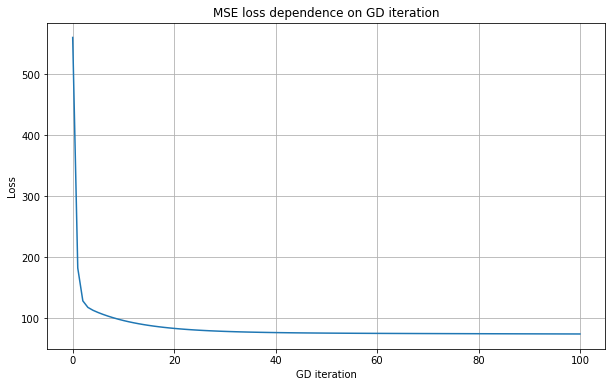

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('MSE loss dependence on GD iteration')
plt.xlabel('GD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [10]:
mse_test = mse_loss(X_test, y_test, lr.w)
print(mse_test)
assert len(loss_history) <= 1000
assert mse_test <= 100

93.86575118282464


### Задание 4 <a id="task4"></a>

Как известно, масштабирование данных может помочь в сходимости градиентного спуска (вспомните, почему). Отмасштабируйте имеющиеся данные с помощью мин-макс шкалирования:

$$
x^j = \frac{x^j - \min(x^j)}{\max(x^j) - \min(x^j)},
$$

где $x^j$ - это вектор значений признака.

Учтите, что единичный признак нормировать не надо (почему?). Так что либо придумайте способ, как отнормировать все столбцы, кроме единичного.

Примените линейную регрессию с градиентным спуском к данным, подберите оптимальную длину шага. Добейтесь того, чтобы значение MSE не превышало 100.

Опишите наблюдения. Изменилась ли ситуация?

In [11]:
# scale the data
# your code here
def scaler(X):
    max_ = X[:, 1:].max(axis=0)
    min_ = X[:, 1:].min(axis=0)
    X[:, 1:] = (X[:, 1:] - min_) / (max_ - min_)
    return X

X_train_scaled = scaler(X_train) 
X_test_scaled = scaler(X_test)


# train linear regression with gradient descent
lr_scaled = CustomLinearRegressionGD()
# your code here
loss_history_2 = lr_scaled.fit(X_train_scaled, y_train, eta=0.1)

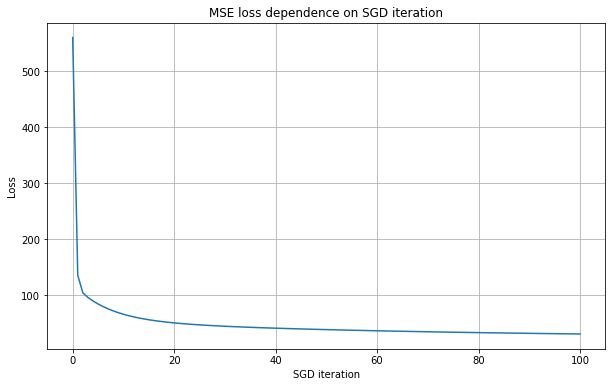

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history_2)
plt.title('MSE loss dependence on SGD iteration')
plt.xlabel('SGD iteration')
plt.ylabel('Loss')
plt.grid()
plt.show()

Ответы на ранние вопросы:
1. Масштабирование улучшает сходимость, так как позволяет уменьшить вероятность пропустить локальную точку минимума из-за неправильно выбранного размера гиперпараметра и значений в вектора градиента.
2. Единичный признак нормировать не требуется, так как специально добавлен для учета $w_0$, а также вызовет ошибку "деления на ноль".


**Вывод:**
Масштабирование признаков позволило увеличить длину шага (learning rate) в $10^5$ раз, при этом ошибка модели на обучаеющей выборке достигло более низких значений по сравнению с нешкалированными данными. Ошибка предсказания на тестовой выборке оказалась также приближенно в 2 раза меньше. Обучшение ниже уровня ошибки равной 100 оказалось быстрее, дальше характер обучения был схожим.

In [13]:
mse_test = mse_loss(X_test_scaled, y_test, lr_scaled.w)
print(mse_test)
assert mse_test <= 100

45.33696248960564


# Часть 2 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

%matplotlib inline

В этой части вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

Данные можно скачать [тут](https://raw.githubusercontent.com/WeaselCMC/ml_dpo_2021/master/hw/hw2/train.csv)

In [4]:
data = pd.read_csv('train.csv', header=0)
data.drop('Id', axis=1, inplace=True)
data.shape

(1460, 80)

In [5]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Задание 1 <a id="task21"></a>

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [6]:
if data.isna().sum().any():
    print(f'В данных есть пропуски в {data.isna().sum()[data.isna().sum() > 0].count()} колонках.')
    for (k,v) in data.isna().sum()[data.isna().sum() > 0].items():
        print(f'В колонке {k} отсутствует {v} значений, что составляет {v / len(data) * 100}%.')

В данных есть пропуски в 19 колонках.
В колонке LotFrontage отсутствует 259 значений, что составляет 17.73972602739726%.
В колонке Alley отсутствует 1369 значений, что составляет 93.76712328767123%.
В колонке MasVnrType отсутствует 8 значений, что составляет 0.547945205479452%.
В колонке MasVnrArea отсутствует 8 значений, что составляет 0.547945205479452%.
В колонке BsmtQual отсутствует 37 значений, что составляет 2.5342465753424657%.
В колонке BsmtCond отсутствует 37 значений, что составляет 2.5342465753424657%.
В колонке BsmtExposure отсутствует 38 значений, что составляет 2.6027397260273974%.
В колонке BsmtFinType1 отсутствует 37 значений, что составляет 2.5342465753424657%.
В колонке BsmtFinType2 отсутствует 38 значений, что составляет 2.6027397260273974%.
В колонке Electrical отсутствует 1 значений, что составляет 0.0684931506849315%.
В колонке FireplaceQu отсутствует 690 значений, что составляет 47.26027397260274%.
В колонке GarageType отсутствует 81 значений, что составляет 5.54

``` Данные пропущены в 19 колонках. В некоторых колонках отсутствует не более 6% данных, но некоторые содержат пропуски в более чем 80% ячеек. Возможно наличие данных в этих колонках является ключевыми характетистиками от которых зависит цена дома. ```

### Задание 2 <a id="task22"></a>

Избавьтесь от пропусков. Заполните пропуски в колонках со значениями типа `object` (это можно проверить методом `.dtype` или `.dtypes`) отдельной категорией 'NaN', а в остальных (типа `float64` и `int64`) - средним по колонке.

Проверьте, что вы действительно избавились от пропусков.

In [7]:
# fill NA-values with 'NaN'
obj_cols = data.dtypes[data.dtypes == 'object'].index
data[obj_cols] = data[obj_cols].fillna('NaN')

# fill NA-values with average values of a column
num_cols = data.dtypes[(data.dtypes == 'float64') | (data.dtypes == 'int64')].index
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data[num_cols] = imp_mean.fit_transform(data[num_cols])

### Задание 3 <a id="task23"></a>

Для каждой колонки, выраженной числами (типа `float64` и `int64`), постройте гистограмму ее значений. Сильно ли отличается масштаб признаков? Отмасштабируйте признаки каким-нибудь методом (например, `StandardScaler` или `MinMaxScaler` из `sklearn`). 

**Не забудьте, что целевая переменная (столбец `'SalePrice'`) не входит в признаки!**

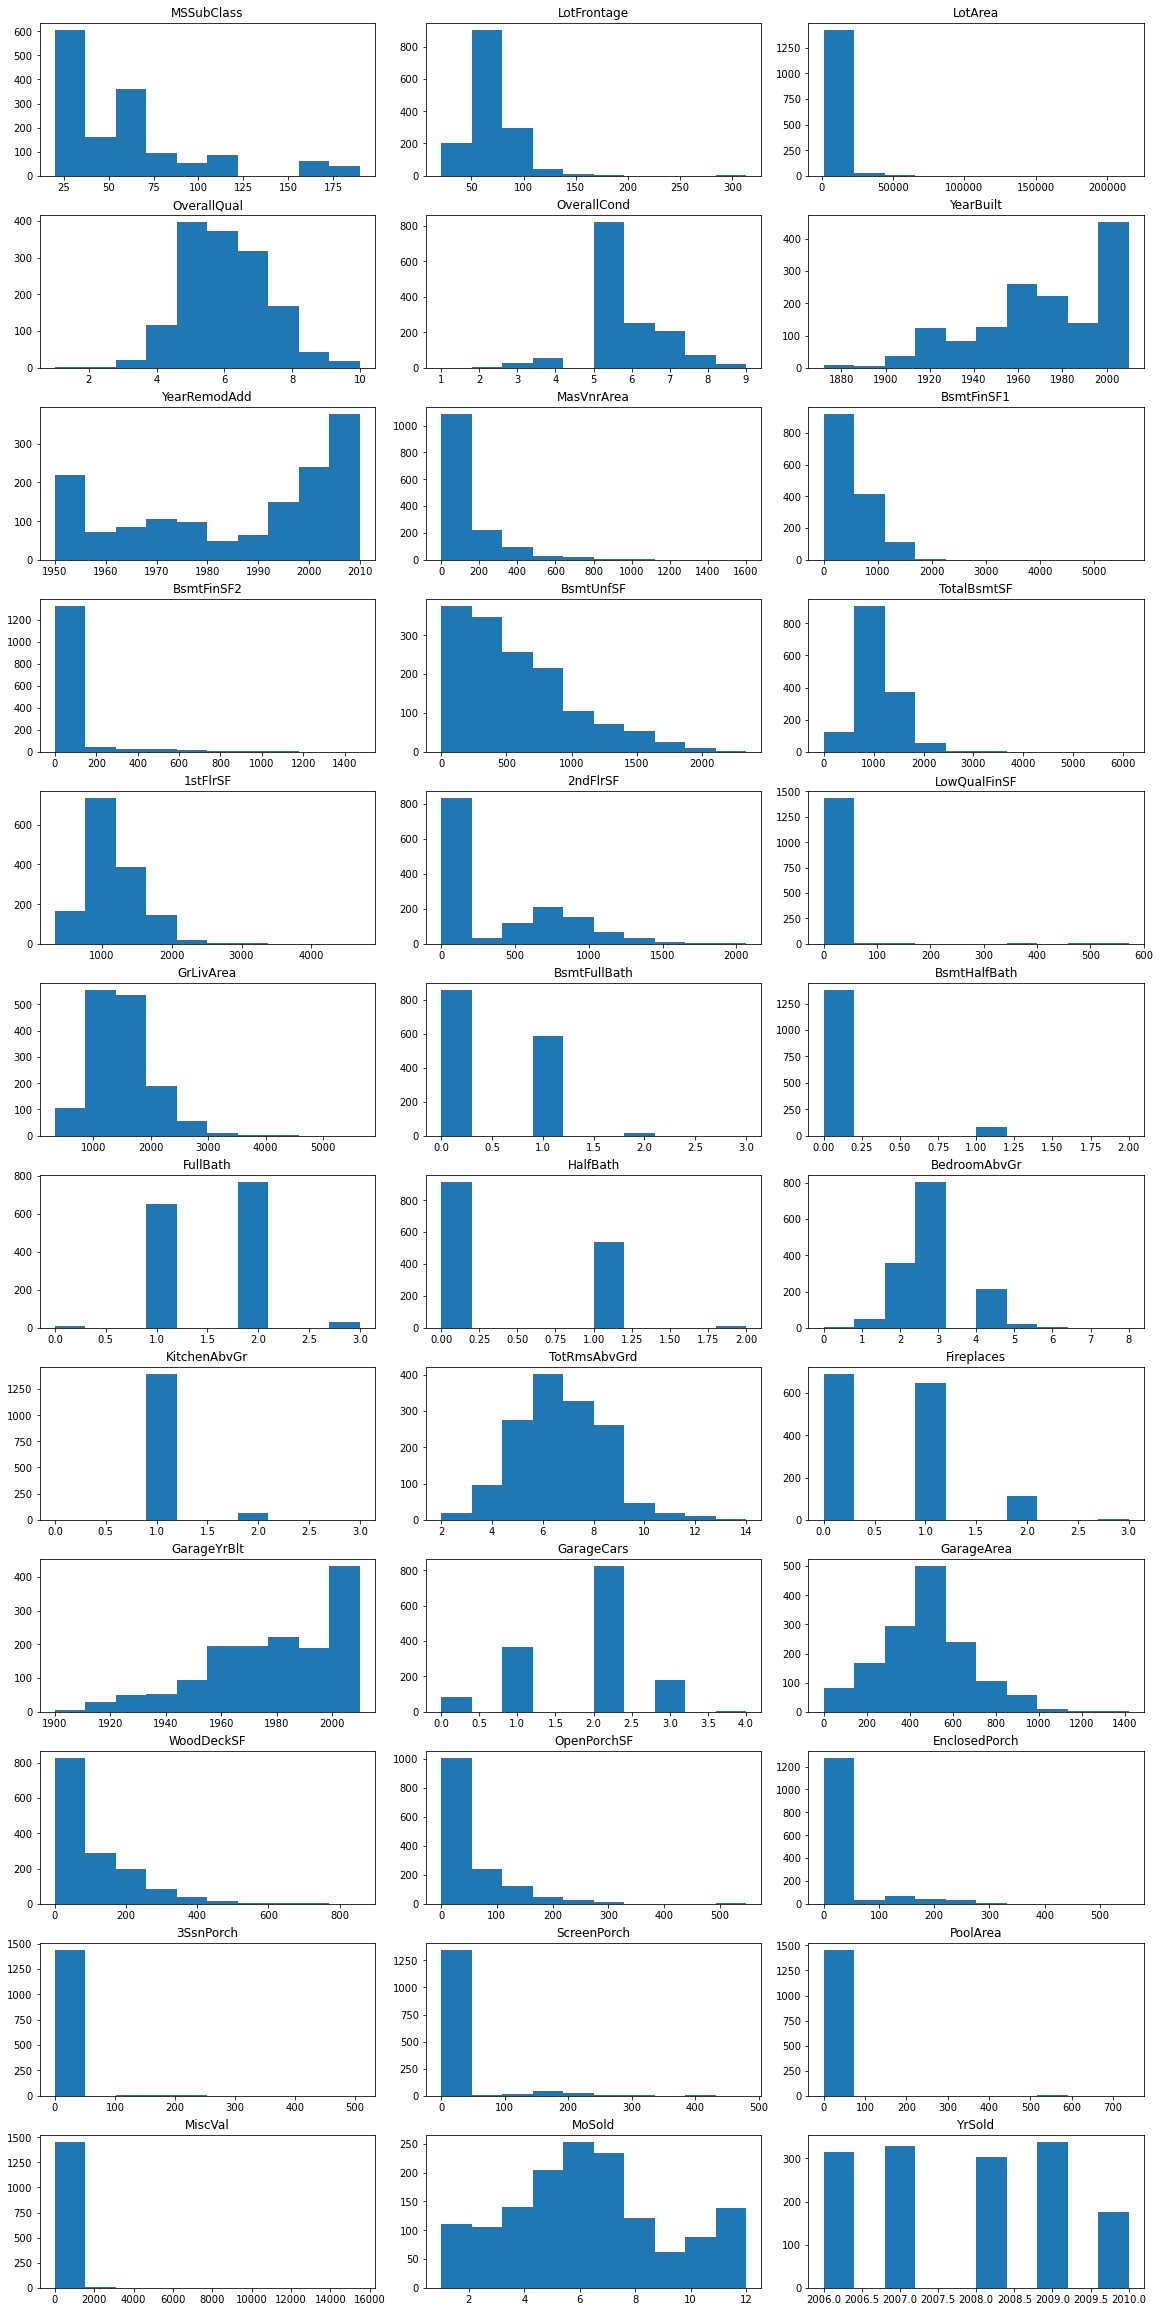

In [8]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

fig, axs = plt.subplots(12, 3, figsize= (16,32), constrained_layout=True)
axs = trim_axs(axs, len(num_cols[:-1]))

for ax, col in zip(axs, num_cols[:-1]):
    ax.set_title(col)
    ax.hist(data[col])

``` Для каждой числовой колонки масштаб признаков сильно отличается. Отшкалируем значение в каждой колонке с помощью  метода "минимум-максимум" ```

In [9]:
scaler = MinMaxScaler()

data_norm = pd.DataFrame(data=scaler.fit_transform(data[num_cols[:-1]]),
                         columns=scaler.get_feature_names_out())

### Задание 4 <a id="task24"></a>

Обработайте категориальные признаки. Примените к ним one-hot кодирование. Сколько получилось колонок у итогового датасета?

In [10]:
# your code here
enc = OneHotEncoder(drop='first', handle_unknown='ignore')

data_enc = pd.DataFrame(data=enc.fit_transform(data[obj_cols]).toarray(),
                        columns=enc.get_feature_names_out())
data_final = pd.concat([data_norm, data_enc, data.SalePrice], axis=1)

print(f'У итогового датасета получилось {data_final.shape[1]} колонок.')

У итогового датасета получилось 262 колонок.


### Задание 5 <a id="task25"></a>

- Постройте гистограмму распределения предсказываемого значения. 
- Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `np.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. 
- Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

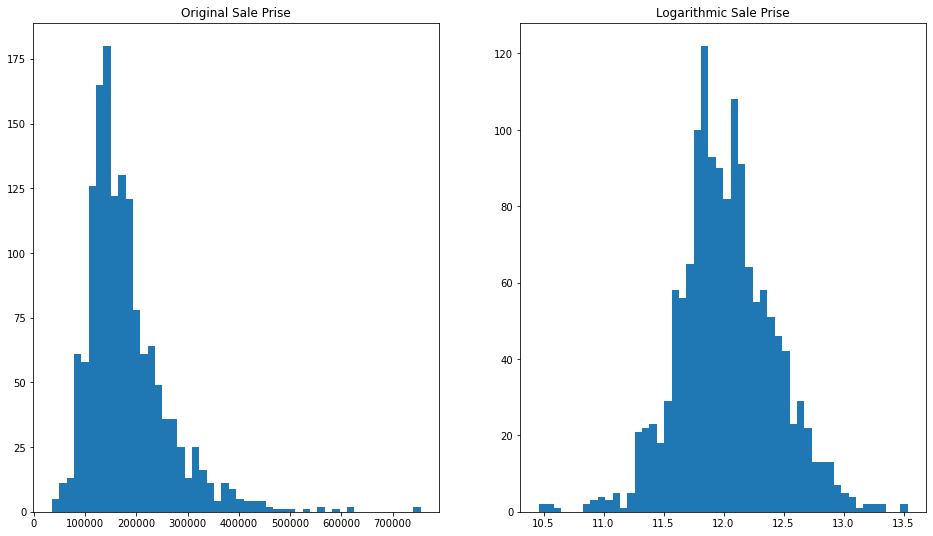

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9))

ax1.set_title('Original Sale Prise')
ax1.hist(data_final.SalePrice, bins=50)

ax2.set_title('Logarithmic Sale Prise')
ax2.hist(np.log1p(data_final.SalePrice), bins=50)

plt.show()

```Распределение данных стало более нормальным, в прологарифмированных данных 'смещение' к началу координат стало менее заметным, также снизился порядок чисел от тысяч к единицам.  ```

---
Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [12]:
X_train, X_val, y_train, y_val = train_test_split(data_final.drop('SalePrice', axis=1), np.log1p(data_final['SalePrice']), random_state=13)

In [13]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 261), (365, 261), (1095,), (365,))

### Задание 6 <a id="task26"></a>

Перейдем к построению моделей машинного обучения с помощью `sklearn`. Обучите модель линейной регрессии на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error (корень из MSE) на обучающей и валидационной выборках. Что вы наблюдаете? Как вы можете объяснить такой результат?

In [14]:
# your code here
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
y_pred_train = lr.predict(X_train)
error_val = mean_squared_error(y_true=y_val, y_pred=y_pred_val, squared=False)
error_train = mean_squared_error(y_true=y_train, y_pred=y_pred_train, squared=False)

print(f'Метрика RMSE на валидационных данных равняется {error_val}, а на тестовых данных ошибка составляет {error_train}.')

Метрика RMSE на валидационных данных равняется 6049674823.5390415, а на тестовых данных ошибка составляет 0.08377912843130735.


``` Полученные результаты указывают на переобучение. Метрика RMSE на валидационных данных на несколько порядков больше по сравнению с обучающими данными. Также полученные результаты могут свидетельствовать о больших значениях коэфициентов параметров линейной модели.```

### Задание 7 <a id="task27"></a>

Теперь примените методы линейной регрессии с регуляризацией - Lasso (L1) и Ridge (L2). 

Для подбора коэффициента регуляризации будем использовать росс-валидацию (вспомните, что такое кросс-валидация и зачем она нужна). 

`GridSearchCV` - это метод, который перебирает значения гиперпараметров (по заданной «сетке»), считает для каждого качество на кросс-валидации и позволяет выбрать лучший гиперпараметр. Более подробно вы можете познакомиться с методом в [документаци](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

1. Прочитайте документацию `sklearn.model_selection.GridSearchCV`
2. Подбирите оптимальный гиперпараметр для LASSO:
    - В качестве сетки используйте `np.logspace(-5, 1)`
    - Используйте 5-Fold Cross-Validation
3. Используя оптимельное значение гиперпаметра обучите модель на всей обучающей выборке, посчитайте ошибку на тренировочной и обучающей выборках
4. Повторите п. 2-3 для модели Ridge

In [15]:
# пример "сетки"
alpha = np.logspace(-5, 1)

In [16]:
# your Lasso code here
search_lasso = GridSearchCV(estimator=Lasso(), 
                            param_grid={'alpha': alpha, 'max_iter': [10000]}, 
                            cv=5,
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1,
                            verbose=3, 
                            return_train_score=True)

search_lasso.fit(X=X_train, y=y_train)

lr_lasso = Lasso(alpha=search_lasso.best_params_.get('alpha'), 
                 max_iter=search_lasso.best_params_.get('max_iter'))

lr_lasso.fit(X_train, y_train)

RMSE_train = mean_squared_error(y_true=y_train, y_pred=lr_lasso.predict(X_train), squared=False)
RMSE_val = mean_squared_error(y_true=y_val, y_pred=lr_lasso.predict(X_val), squared=False)

print(f'Ошибка на обучающей выборке {RMSE_train}.')
print(f'Ошибка на валидационной выборке {RMSE_val}.')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Ошибка на обучающей выборке 0.09402680409404489.
Ошибка на валидационной выборке 0.20578551807177584.


In [17]:
# your Ridge code here
search_ridge = GridSearchCV(estimator=Ridge(), 
                            param_grid={'alpha': alpha, 'max_iter': [10000]}, 
                            cv=5,
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1,
                            verbose=3, 
                            return_train_score=True)

search_ridge.fit(X=X_train, y=y_train)

lr_ridge = Ridge(alpha=search_ridge.best_params_.get('alpha'), 
                 max_iter=search_ridge.best_params_.get('max_iter'))

lr_ridge.fit(X_train, y_train)

RMSE_train = mean_squared_error(y_true=y_train, y_pred=lr_ridge.predict(X_train), squared=False)
RMSE_val = mean_squared_error(y_true=y_val, y_pred=lr_ridge.predict(X_val), squared=False)

print(f'Ошибка на обучающей выборке {RMSE_train}.')
print(f'Ошибка на валидационной выборке {RMSE_val}.')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Ошибка на обучающей выборке 0.08781908047085453.
Ошибка на валидационной выборке 0.2016412239276262.


### Задание 8 <a id="task28"></a>

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

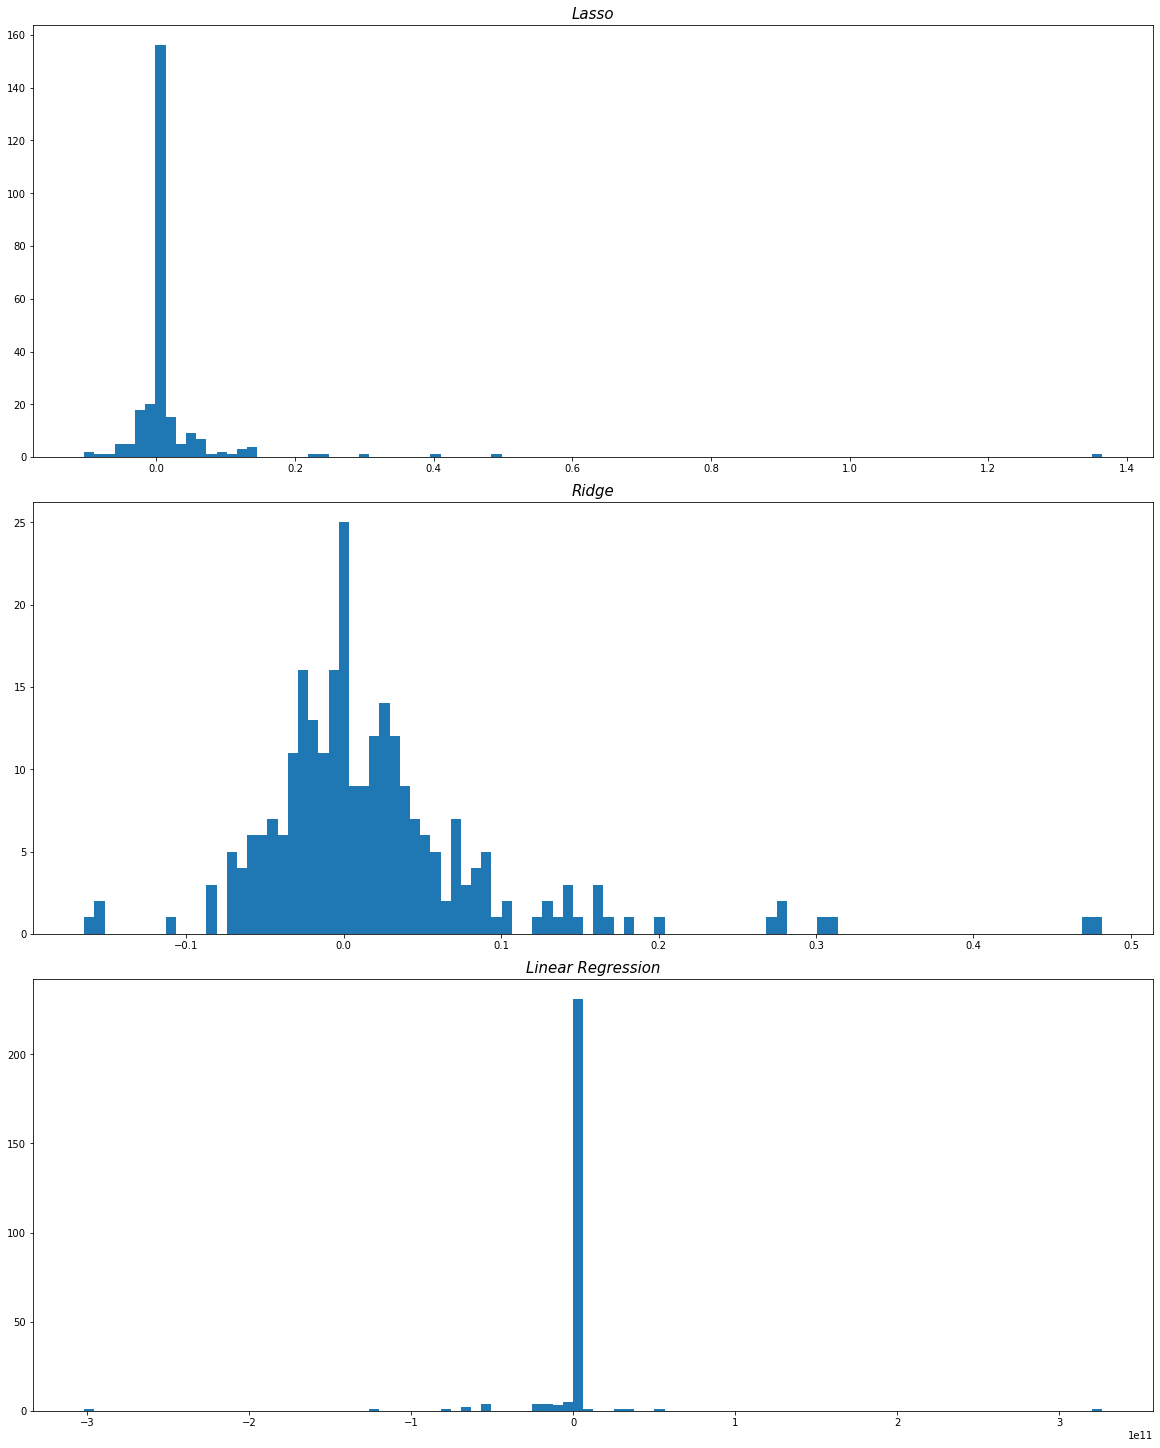

In [29]:
# your code here

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16,20), constrained_layout=True)

ax1.hist(lr_lasso.coef_, bins=100)
ax1.set_title('Lasso', style='italic', fontsize=15)

ax2.hist(lr_ridge.coef_, bins=100)
ax2.set_title('Ridge', style='italic', fontsize=15)

ax3.hist(lr.coef_, bins=100)
ax3.set_title('Linear Regression', style='italic', fontsize=15)

plt.show()

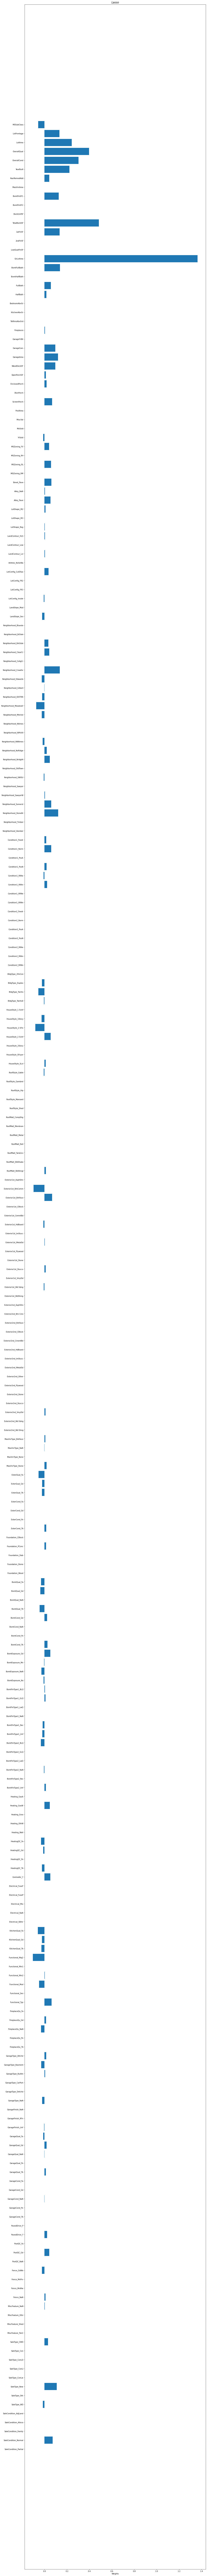

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,200), constrained_layout=True)

ax.barh(y=np.arange(len(lr_lasso.feature_names_in_)), width=lr_lasso.coef_)
ax.set_yticks(np.arange(len(lr_lasso.feature_names_in_)))
ax.set_yticklabels(labels=lr_lasso.feature_names_in_.tolist())
ax.invert_yaxis()
ax.set_xlabel('Weights')
ax.set_title("Lasso", style='italic', fontsize=15)

plt.show()

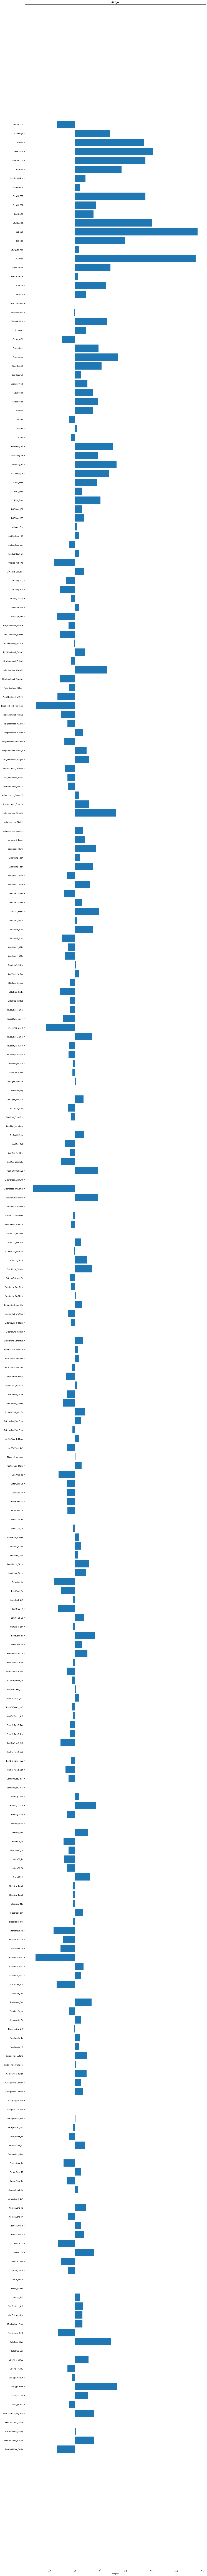

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,200), constrained_layout=True)

ax.barh(y=np.arange(len(lr_ridge.feature_names_in_)), width=lr_ridge.coef_)
ax.set_yticks(np.arange(len(lr_ridge.feature_names_in_)))
ax.set_yticklabels(labels=lr_ridge.feature_names_in_.tolist())
ax.invert_yaxis()
ax.set_xlabel('Weights')
ax.set_title("Ridge", style='italic', fontsize=15)

plt.show()

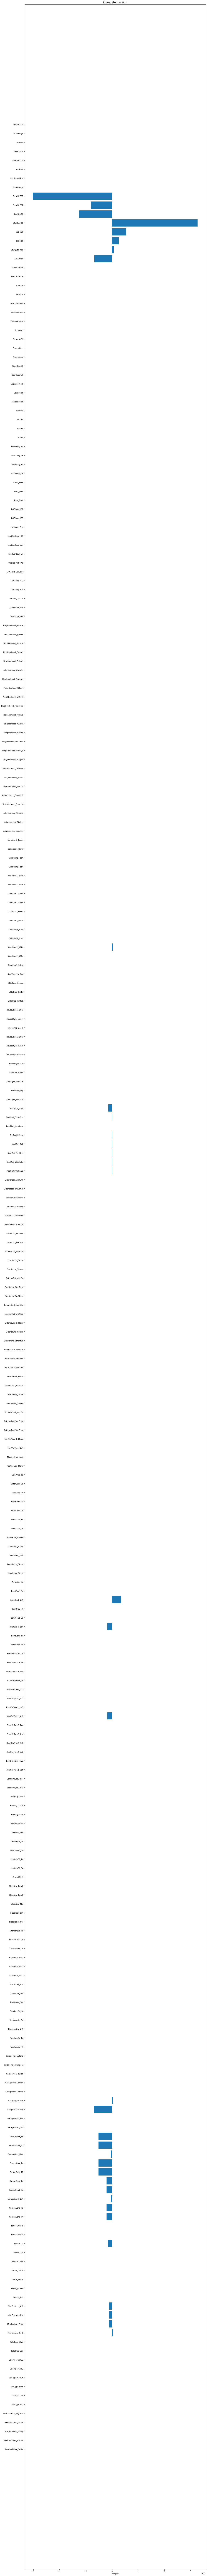

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,200), constrained_layout=True)

ax.barh(y=np.arange(len(lr.feature_names_in_)), width=lr.coef_)
ax.set_yticks(np.arange(len(lr.feature_names_in_)))
ax.set_yticklabels(labels=lr.feature_names_in_.tolist())
ax.invert_yaxis()
ax.set_xlabel('Weights')
ax.set_title("Linear Regression", style='italic', fontsize=15)

plt.show()

``` Значения коэффициентов в простой линейной регрессии значительно больше, также намного больше нулевых значений. Наименьшее количество нулевых значений у Ridge регрессии и сами они больше сконцентрированы вокруг нуля. Lasso является промежуточным решением между простой линейной и Ridge регрессиями, у нее много нулевых значений,но концентрация коэффициентов ближе к нулю, но есть несколько выбросов в правую сторону ```

### Задание 9 (Бонус) <a id="task29"></a>


- Скачайте тестовые данные из соревнования [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv)
- Примените к ним те же шаги предобработки (заполнение пропусков, масштабирование, и т.д.)
- Выберите лучшую модель, которую вам удалось обучить и предскажите с ее помощью цену 
- На забудьте, что ваша модель предсказывает логарифм (см. Задание 5), так что нужно применить обраное преобразование
- Загрузите ваши прогнозы на Kaggle (`Submit Prediction`) и узнайте их точность. 

In [33]:
# your code here